
# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key 

   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | vermillion
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | urengoy
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | itoigawa
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | deputatskiy
Processing Record 11 of Set 1 | maloshuyka
City not found. Skipping...
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | kutum
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | bafia
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | oranjemund
Processing Record 21 of Set 1 

Processing Record 34 of Set 4 | narsaq
Processing Record 35 of Set 4 | vao
Processing Record 36 of Set 4 | henties bay
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | north bend
Processing Record 41 of Set 4 | sao jose da coroa grande
Processing Record 42 of Set 4 | muros
Processing Record 43 of Set 4 | mentok
City not found. Skipping...
Processing Record 44 of Set 4 | pimentel
Processing Record 45 of Set 4 | kemijarvi
Processing Record 46 of Set 4 | bastrop
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | edgewater
Processing Record 49 of Set 4 | ribeira grande
Processing Record 0 of Set 5 | aklavik
Processing Record 1 of Set 5 | sarandi
Processing Record 2 of Set 5 | tinskoy
Processing Record 3 of Set 5 | sawakin
Processing Record 4 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | pal

Processing Record 24 of Set 8 | pevek
Processing Record 25 of Set 8 | rio brilhante
Processing Record 26 of Set 8 | severo-kurilsk
Processing Record 27 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 28 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | sobolevo
Processing Record 31 of Set 8 | mumford
Processing Record 32 of Set 8 | bambanglipuro
Processing Record 33 of Set 8 | cascais
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | khonuu
City not found. Skipping...
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | alzamay
Processing Record 39 of Set 8 | innisfail
Processing Record 40 of Set 8 | yirol
City not found. Skipping...
Processing Record 41 of Set 8 | palairos
Processing Record 42 of Set 8 | nisia floresta
Processing Record 43 of Set 8 | chekhov
Processing Record 44 of Set 8 | maniitsoq
Processing Reco

Processing Record 12 of Set 12 | panaba
Processing Record 13 of Set 12 | kruisfontein
Processing Record 14 of Set 12 | nevel
Processing Record 15 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 12 | zolotkovo
Processing Record 17 of Set 12 | honningsvag
Processing Record 18 of Set 12 | saravan
Processing Record 19 of Set 12 | cochrane
Processing Record 20 of Set 12 | nguiu
City not found. Skipping...
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | timmins
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | kupang
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | la rioja
Processing Record 28 of Set 12 | bubaque
Processing Record 29 of Set 12 | treinta y tres
Processing Record 30 of Set 12 | qaqortoq
Processing Record 31 of Set 12 | minot
Processing Record 32 of Set 12 | ocean city
Processing Record 33 of Set 12 | coihaique
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,300.76,74,100,3.71,MV,1676823605
1,cherskiy,68.7500,161.3000,241.43,95,100,1.38,RU,1676823606
2,hilo,19.7297,-155.0900,293.77,94,100,0.45,US,1676823606
3,vermillion,42.7794,-96.9292,273.24,89,54,3.95,US,1676823362
4,cape town,-33.9258,18.4232,296.38,64,20,5.81,ZA,1676823607


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.76,74,100,3.71,MV,1676823605
1,cherskiy,68.7500,161.3000,241.43,95,100,1.38,RU,1676823606
2,hilo,19.7297,-155.0900,293.77,94,100,0.45,US,1676823606
3,vermillion,42.7794,-96.9292,273.24,89,54,3.95,US,1676823362
4,cape town,-33.9258,18.4232,296.38,64,20,5.81,ZA,1676823607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

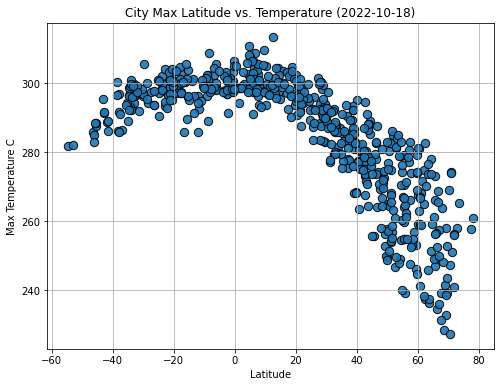

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,marker="o",edgecolors="black",figsize=(8,6),s=70, alpha=0.90,\
                  title="City Max Latitude vs. Temperature (2022-10-18)")


# # Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

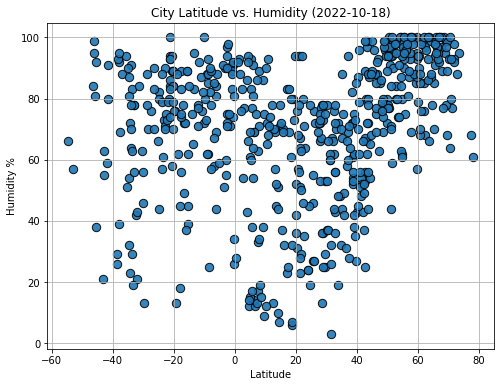

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,marker="o",edgecolors="black",figsize=(8,6),s=70, alpha=0.90,\
              title="City Latitude vs. Humidity (2022-10-18)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

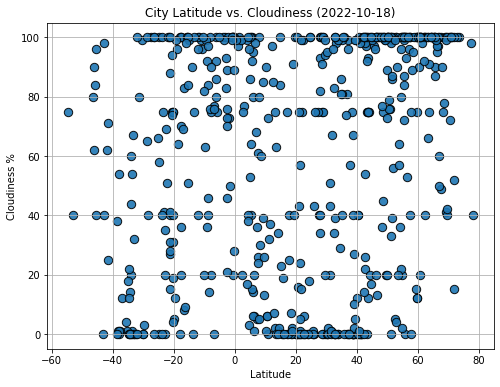

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,marker="o",edgecolors="black",figsize=(8,6),s=70, alpha=0.90,\
              title="City Latitude vs. Cloudiness (2022-10-18)")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

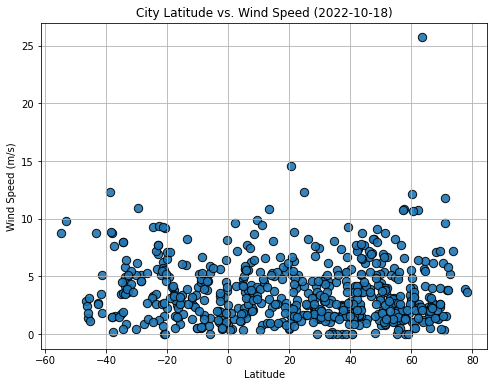

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,marker="o",edgecolors="black",figsize=(8,6),s=70, alpha=0.90,\
              title="City Latitude vs. Wind Speed (2022-10-18)")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cherskiy,68.7500,161.3000,241.43,95,100,1.38,RU,1676823606
2,hilo,19.7297,-155.0900,293.77,94,100,0.45,US,1676823606
3,vermillion,42.7794,-96.9292,273.24,89,54,3.95,US,1676823362
5,urengoy,65.9667,78.3667,249.01,100,99,1.26,RU,1676823608
7,itoigawa,37.0333,137.8500,278.16,94,99,7.38,JP,1676823610


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.76,74,100,3.71,MV,1676823605
4,cape town,-33.9258,18.4232,296.38,64,20,5.81,ZA,1676823607
6,rikitea,-23.1203,-134.9692,299.71,73,41,7.72,PF,1676823609
15,busselton,-33.6500,115.3333,293.08,63,0,6.45,AU,1676823454
16,oranjemund,-28.5500,16.4333,294.16,70,40,5.14,NaN,1676823615


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8561128501690294


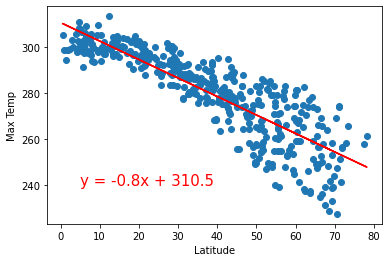

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5769007168879879


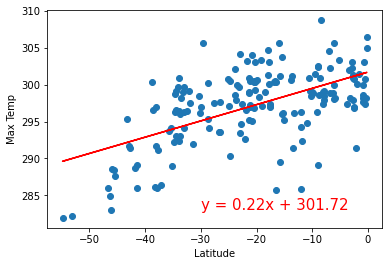

In [17]:
# Linear regression on Southern Hemisphere
xs_values = southern_hemi_df['Lat']
ys_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs_values,ys_values)
plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-30,283),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [18]:
#In the Northern Hemisphere, we can say that there is a medium to stronger inverse linear relationship between Max temp & Latitude. 
#Teperature seems to increase as Latitude decreases. r value is close to -1

##In the Southern Hemisphere, we can say that there is a medium linear relationship between Max temp & Latitude. 
#Teperature increases as Latitude increases.r value is .5


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5352894241150594


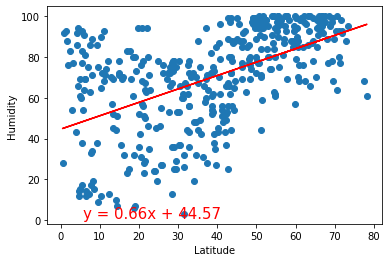

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
yh_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yh_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,yh_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.17199073182643154


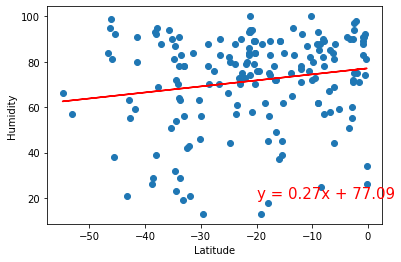

In [20]:
# Southern Hemisphere
xs_values = southern_hemi_df['Lat']
ysh_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ysh_values)
regress_values = xs_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs_values,ysh_values)
plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [21]:
#In the Northern Hemisphere, we can say that there is a weak or almost zero linear relationship between Humidity & Latitude. r-value is .5


#In the Southern Hemisphere, we can say that there is almost zero linear relationship between Humidity & Latitude. r-value is closeto 0


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3669061590289211


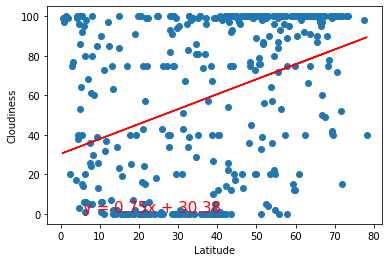

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
yc_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yc_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,yc_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.39761376840315854


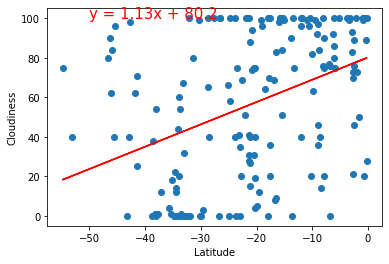

In [24]:
# Southern Hemisphere
xs_values = southern_hemi_df['Lat']
ysc_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ysc_values)
regress_values = xs_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs_values,ysc_values)
plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [25]:
#In the Northern Hemisphere, we can say that there is a weak linear relationship between Cloudiness & Latitude. r-value is .36


#In the Southern Hemisphere, we can say that there is a weak linear relationship between Cloudiness & Latitude. r-value is .39

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006574153346377899


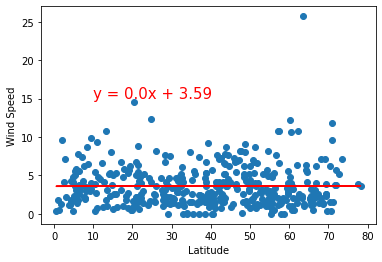

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
yw_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yw_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,yw_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.23417344850483615


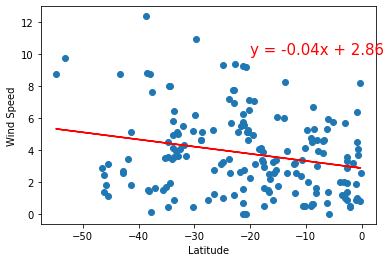

In [27]:
# Southern Hemisphere
xs_values = southern_hemi_df['Lat']
ysw_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ysw_values)
regress_values = xs_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs_values,ysw_values)
plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [28]:
#In the Northern Hemisphere, we can say that there is almost zero linear relationship between Wind Speed & Latitude. r-value is .0065


#In the Southern Hemisphere, we can say that there is a weak or almost zero inverse linear relationship between Wind Speed & Latitude. r-value is -.23